Question 2

In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


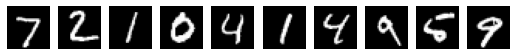

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [4]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# loading image
S1 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/s1.png", target_size=(28, 28), color_mode = "grayscale")

S2 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/s2.png", target_size=(28, 28), color_mode = "grayscale")

S3 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/s3.png", target_size=(28, 28), color_mode = "grayscale")

S4 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/s4.png", target_size=(28, 28), color_mode = "grayscale")

S5 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/s5.png", target_size=(28, 28), color_mode = "grayscale")

In [5]:
new_images = np.vstack([S1,S2,S3,S4,S5,])
test_s = new_images.reshape(-1, 784)
train_s = new_images.reshape(-1, 784)
train_s = train_s.astype('float32') /255
test_s = test_s.astype('float32') /255

oversampling

In [6]:
train_s = np.repeat(train_s[:],25,axis=0)

In [7]:
train_s.shape

(125, 784)

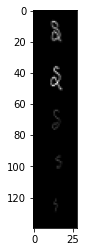

In [8]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

In [9]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/10
469/469 [==============================] - 16s 30ms/step - loss: 0.1864 - val_loss: 0.1049
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1185 - val_loss: 0.0866
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1037 - val_loss: 0.0789
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0971 - val_loss: 0.0748
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0930 - val_loss: 0.0724
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0898 - val_loss: 0.0701
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0872 - val_loss: 0.0690
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0855 - val_loss: 0.0676
Epoch 9/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0841 - val_loss: 0.0667
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


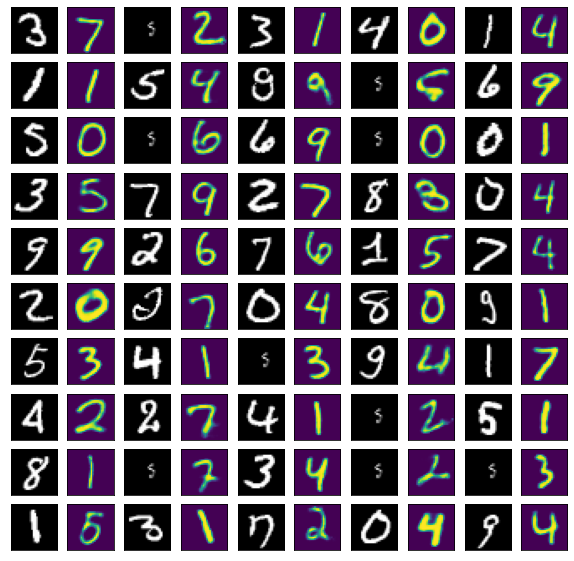

Epoch 1/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0819 - val_loss: 0.0749
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0811 - val_loss: 0.0742
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0804 - val_loss: 0.0744
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0798 - val_loss: 0.0732
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0791 - val_loss: 0.0733
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0787 - val_loss: 0.0727
Epoch 7/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0781 - val_loss: 0.0725
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0778 - val_loss: 0.0722
Epoch 9/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0773 - val_loss: 0.0714
Epoch 10/10
313/313 [==============================] - 3s 10ms/step


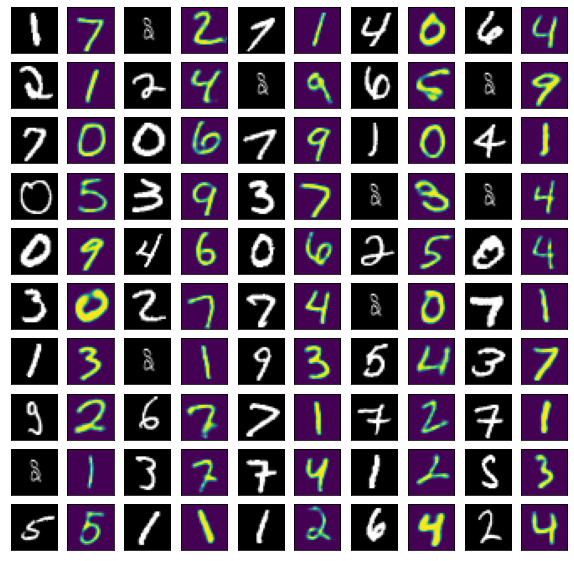

Epoch 1/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0767 - val_loss: 0.0725
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0764 - val_loss: 0.0720
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0760 - val_loss: 0.0718
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0759 - val_loss: 0.0718
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0756 - val_loss: 0.0712
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0753 - val_loss: 0.0710
Epoch 7/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0752 - val_loss: 0.0712
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0748 - val_loss: 0.0711
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0747 - val_loss: 0.0704
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


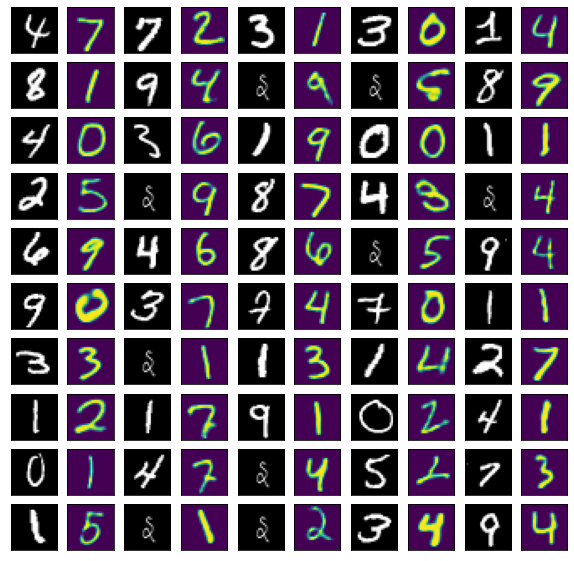

Epoch 1/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0744 - val_loss: 0.0703
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0741 - val_loss: 0.0705
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0740 - val_loss: 0.0703
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0738 - val_loss: 0.0699
Epoch 5/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0736 - val_loss: 0.0701
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0736 - val_loss: 0.0703
Epoch 7/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0734 - val_loss: 0.0698
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0733 - val_loss: 0.0700
Epoch 9/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0732 - val_loss: 0.0698
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


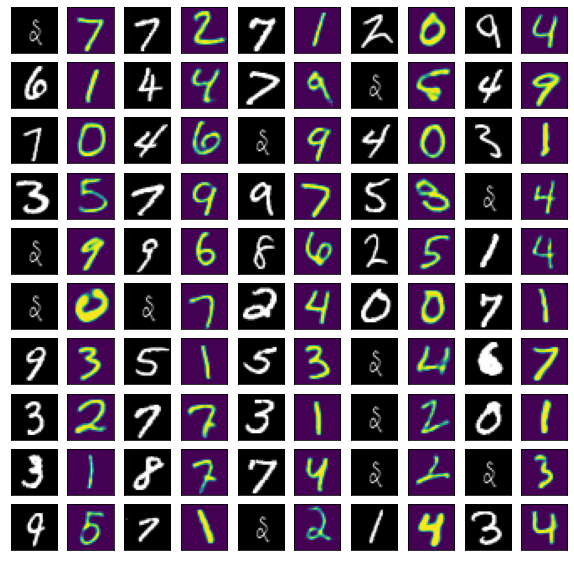

Epoch 1/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0730 - val_loss: 0.0615
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0728 - val_loss: 0.0608
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0726 - val_loss: 0.0611
Epoch 4/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0725 - val_loss: 0.0613
Epoch 5/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0724 - val_loss: 0.0610
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0724 - val_loss: 0.0612
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0722 - val_loss: 0.0609
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0722 - val_loss: 0.0606
Epoch 9/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0721 - val_loss: 0.0608
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


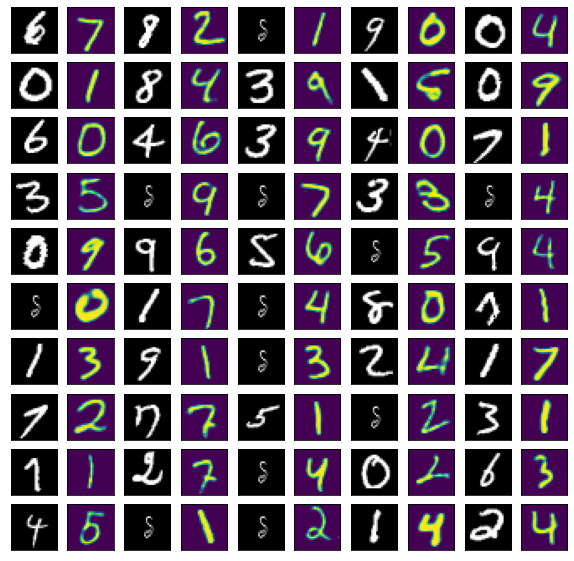

In [11]:
for i in range(5):
    if i >= len(train_s):
        break

    input_arr = train_s[i]

    input_arr = input_arr.reshape(784)

    np.random.shuffle(train_s)

    bad_images = [input_arr for _ in range(135)]
    new_image_set = np.vstack((train_images[:500], bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

    # Train the autoencoder with MNIST data
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
        x=train_images, # For autoencoders, both the input and the target are the same
        y=train_images, 
        epochs=10, 
        batch_size=128,
        shuffle=True, 
        validation_data=(new_images_test, new_images_test),
        callbacks=[early_stop]
    )
    reconstructed_images = autoencoder.predict(test_images)

    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()

In this model we have runned mnist dataset and Images together, this model is unable to predict the images properly. 